In [141]:
import numpy as np
import scipy.optimize as spopt
import scipy.integrate as spint
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
N = 50
P = np.pi/2

z0 = np.random.rand(50)*P

# x = np.linspace(0,1,N)
# y = np.cos(np.arcsin(x))
# z0 = np.append(x[-1],y[:-1]) # perfect guess can be useful for testing your functions

In [143]:
def z2xy(z):
    x = np.linspace(0,z[0],N)
    y = np.append(z[1:],0)
    return x,y
x,y = z2xy(z0)
# plt.plot(x,y)

In [144]:
def obj(z):
    x,y = z2xy(z)
    A = spint.trapz(y,x)
    return -A
A = obj(z0)
# print A

In [145]:
def con(z):
    x,y = z2xy(z)
    x1 = x[:-1]
    x2 = x[1:]
    y1 = y[:-1]
    y2 = y[1:]
    l = sum(np.sqrt((x2 - x1)**2 + (y2 - y1)**2))
    return P - l
c = con(z0)
# print c

In [146]:
bounds = [(0, P) for i in range(N)]

In [147]:
nonlcon = {"type":"eq", "fun":con}

In [148]:
sol = spopt.minimize(obj,z0,bounds = bounds, constraints = nonlcon)

In [149]:
# print sol

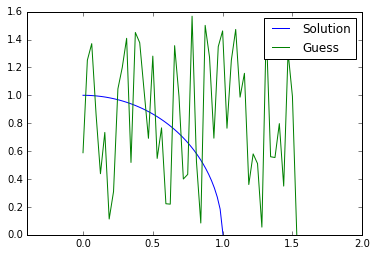

In [161]:
z = sol.x
x,y = z2xy(z)
x0,y0 = z2xy(z0)

plt.plot(x,y,x0,y0)
plt.axis("equal")
plt.legend(["Solution","Guess"])
